In [99]:
import pandas as pd
import numpy as np

In [100]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [101]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [102]:
df.shape

(5572, 5)

step to  do
data cleaning
EDA
Text  preprocessing
Model building
Evaluation
Improvement
website
Deployment

# Data cleaning

In [103]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [105]:
#drop last 3  columns

df=df.iloc[:,:2] # df.drop(columns=['Unnamed: 2 ','Unnamed: 3 ','Unnamed: 4'],inplace=True)

In [106]:
df.sample(5)

,v1,v2
1755,ham,Really good:)dhanush rocks once again:)
486,spam,FREE MESSAGE Activate your 500 FREE Text Messa...
4241,spam,Show ur colours! Euro 2004 2-4-1 Offer! Get an...
1193,spam,Sex up ur mobile with a FREE sexy pic of Jorda...
3685,ham,I get out of class in bsn in like &lt;#&gt; ...


In [107]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True) ## renaming colunms

In [108]:
df.sample(2)

,target,text
1619,ham,Friends that u can stay on fb chat with
4507,ham,Not able to do anything.


In [109]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [111]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [112]:
df.duplicated().sum()

403

In [113]:
#removing  duplicate

df=df.drop_duplicates(keep='first')




In [114]:
df.duplicated().sum()

0

In [115]:
df.shape

(5169, 2)

# EDA

In [116]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as  sns

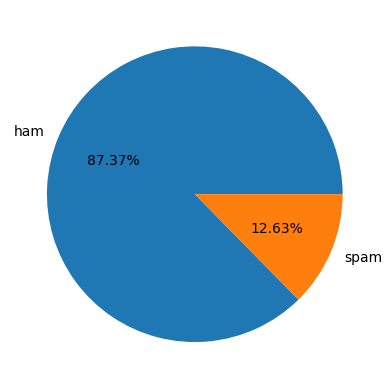

In [119]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f%%')
plt.show()

###  note that data is  imbalanced

In [120]:
! pip install nltk

In [121]:
import  nltk

In [122]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\KARAN PRATAP
[nltk_data]     LOHIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\KARAN PRATAP
[nltk_data]     LOHIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [123]:
df['num_character']=df['text'].apply(len)  #no. of character

In [124]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [125]:
# num of words
df['num_words']=df['text'].apply(lambda x :len(word_tokenize(x)))


In [126]:
df['num_sen']=df['text'].apply(lambda x :len(sent_tokenize(x)))

In [127]:
df

,target,text,num_character,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [128]:
df[['num_character','num_words','num_sen']].describe()

,num_character,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [129]:
df[df['target']==0][['num_character','num_words','num_sen']].describe()

,num_character,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [130]:
df[df['target']==1][['num_character','num_words','num_sen']].describe()

,num_character,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


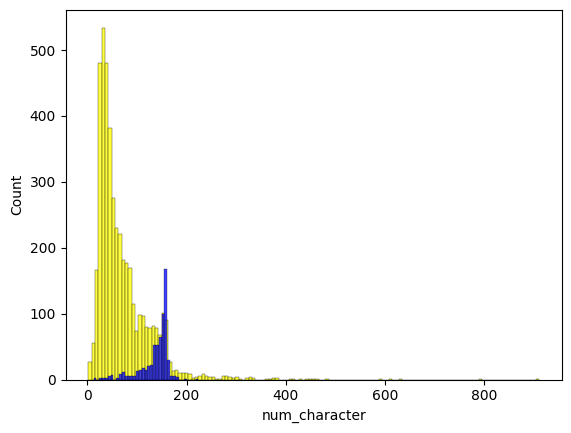

In [131]:
sns.histplot(df[df['target']==0]['num_character'],color='yellow')
sns.histplot(df[df['target']==1]['num_character'],color='blue')
plt.show()

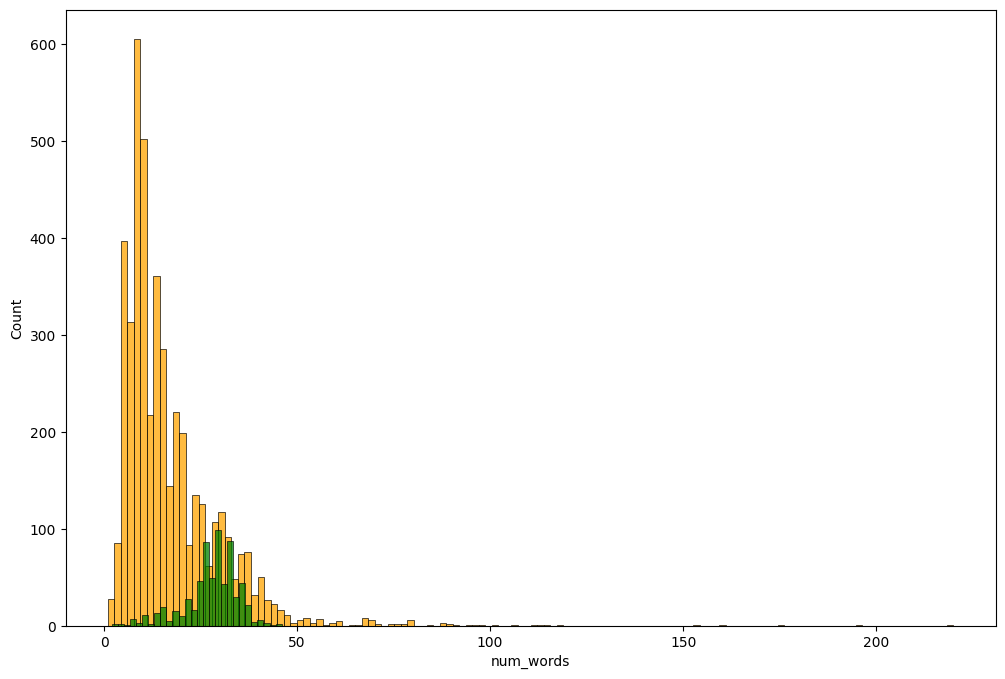

In [132]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'],color='orange')
sns.histplot(df[df['target']==1]['num_words'],color='green')
plt.show()

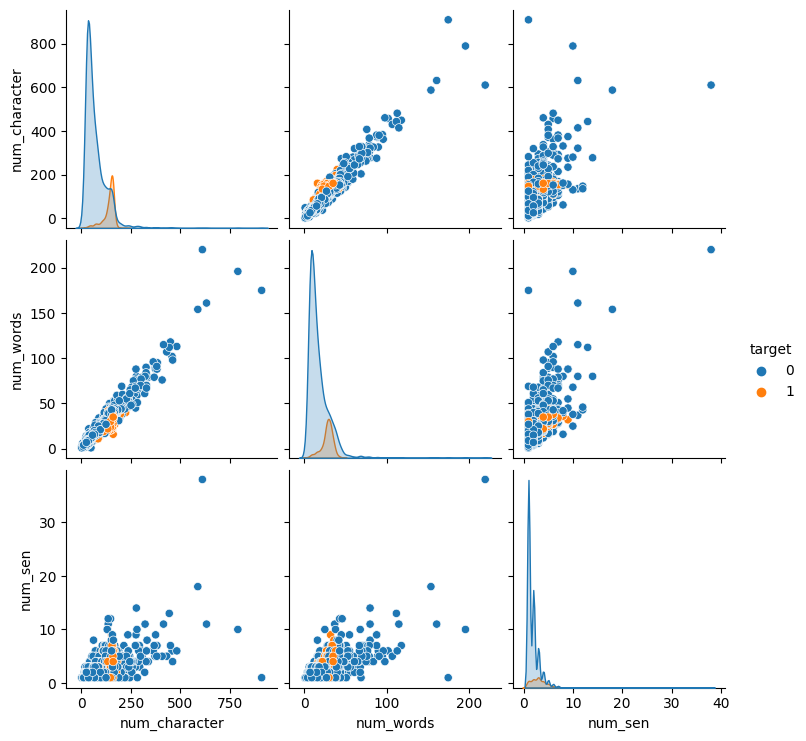

In [133]:
sns.pairplot(df,hue='target')
plt.show()


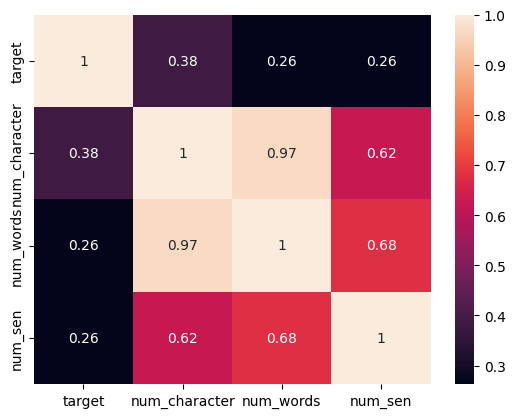

In [134]:
sns.heatmap(df.corr( numeric_only=True),annot=True)
plt.show()

correlation between no. of chacter and the  target is high so we use num_character


### 3. Data Preprocessing

Here are the main preprocessing steps:

- **Lower case**: Convert all text to lowercase to ensure uniformity (e.g., "Hello" → "hello").
- **Tokenization**: Break text into individual words or tokens (e.g., "I am happy" → ["I", "am", "happy"]).
- **Removing special characters**: Eliminate characters like @, #, $, %, etc., which do not carry meaning.
- **Removing stop words and punctuation**: Remove common words (like "the", "is") and punctuation that add little value to analysis.
- **Stemming**: Reduce words to their root form (e.g., "playing", "played" → "play").


In [135]:
nltk.data.path.append('D:\Program Files') ## since nltk files are downloaded 
#at d drive and  using the code  

from nltk.corpus import stopwords
# stopwords.words('english')

In [136]:
##  for steming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')   ## convert all the words to their root word

'danc'

In [137]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [138]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
            
    return " ".join(y)
    

In [139]:
transform_text(df['text'][100])

'okay name ur price long legal wen pick u ave x am xx'

In [140]:
df['transformed_text']=df['text'].apply(transform_text)

In [141]:
df.head()

,target,text,num_character,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [142]:
! pip install wordcloud

In [143]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')


In [144]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

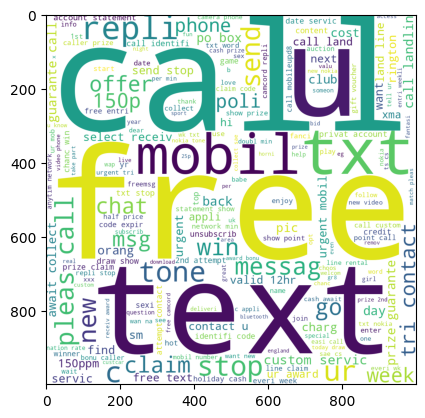

In [145]:
plt.imshow(spam_wc)
plt.show()

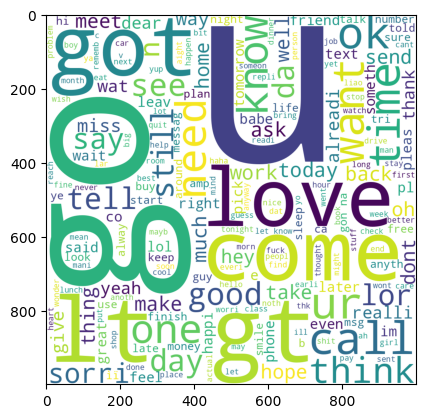

In [146]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.show()

In [147]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
    

In [148]:
len(spam_corpus)


9939

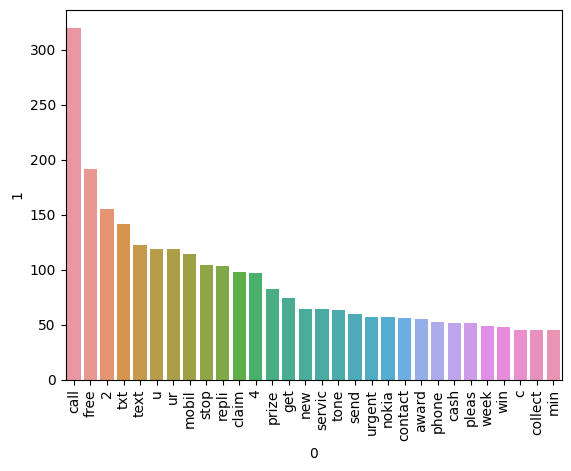

In [149]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [150]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)

In [151]:
len(ham_corpus)

35404

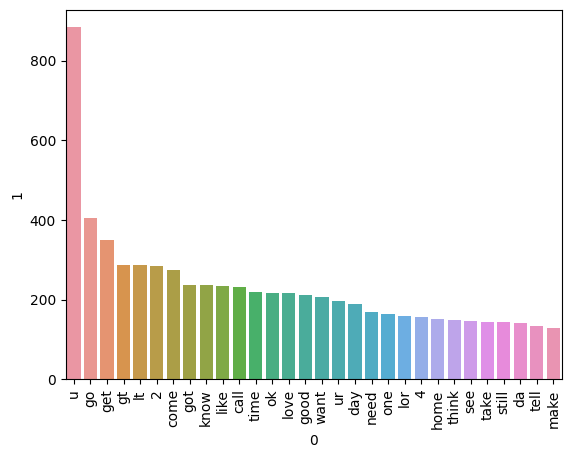

In [152]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
           y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [153]:
# converting text to vector
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()


In [154]:
#x=tfidf.fit_transform(df['transformed_text']).toarray()
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [155]:
x.shape

(5169, 6708)

In [156]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [157]:
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [170]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import  accuracy_score,confusion_matrix,precision_score,f1_score,recall_score


In [159]:
gb=GaussianNB()
mn=MultinomialNB()
bn=BernoulliNB()

In [160]:
gb.fit(xtrain,ytrain)
ypred_gb=gb.predict(xtest)
print(accuracy_score(ytest,ypred_gb))
print(confusion_matrix(ytest,ypred_gb))
print(precision_score(ytest,ypred_gb))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [161]:
mn.fit(xtrain,ytrain)
ypred_mn=mn.predict(xtest)
print(accuracy_score(ytest,ypred_mn))
print(confusion_matrix(ytest,ypred_mn))
print(precision_score(ytest,ypred_mn))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


###  since  we are working  with imbalanced data so we  want the  precision score to be  high. here naive bayse  with  multinomial have high precision

In [162]:
bn.fit(xtrain,ytrain)
ypred_bn=bn.predict(xtest)
print(accuracy_score(ytest,ypred_bn))
print(confusion_matrix(ytest,ypred_bn))
print(precision_score(ytest,ypred_bn))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


### using another models

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [164]:
lg=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
nb=MultinomialNB()
dt=DecisionTreeClassifier(max_depth=5)
rf=RandomForestClassifier(n_estimators=50,random_state=2)
ad=AdaBoostClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
bg=BaggingClassifier(n_estimators=50,random_state=2)
gb=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)


In [165]:
classifier={
    'SVC':svc,
    'LR':lg,
    'Nb':nb,
    'DT':dt,
    'ETC':etc,
    'RF':rf,
    'AD':ad,
    'GB':gb,
    'BG':bg,
    'XGB':xgb
    
}

In [174]:
classifier.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('Nb', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AD', AdaBoostClassifier(random_state=2)), ('GB', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('BG', BaggingClassifier(n_estimators=50, random_state=2)), ('XGB', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=N

In [175]:
def train_classifier(clf,xtrain,ytrain,xtest,ytest):
    
    clf.fit(xtrain,ytrain)
    ypred=clf.predict(xtest)
    accuracy=accuracy_score(ytest,ypred)
    precision=precision_score(ytest,ypred)
    F1_score=f1_score(ytest,ypred)
    Recall=recall_score(ytest,ypred)
    
    return accuracy,precision,F1_score,Recall


In [176]:
accuracy_scr=[]
precision_scr=[]
Recall_scr=[]
F1_scr=[]
for name,clf in classifier.items():
    accuracy,precision,F1_score,Recall=train_classifier(clf,xtrain,ytrain,xtest,ytest)
    print("for -",name)
    print("accuracy :",accuracy)
    print("precision :",precision)
    print("recall :",Recall)
    print("F1_score :",F1_score)
    
    
    accuracy_scr.append(accuracy)
    precision_scr.append(precision)
    Recall_scr.append(Recall)
    F1_scr.append(F1_score)
    

for - SVC
accuracy : 0.971953578336557
precision : 0.9393939393939394
recall : 0.8551724137931035
F1_score : 0.8953068592057762
for - LR
accuracy : 0.9439071566731141
precision : 0.865546218487395
recall : 0.7103448275862069
F1_score : 0.7803030303030304
for - Nb
accuracy : 0.9613152804642167
precision : 0.9906542056074766
recall : 0.7310344827586207
F1_score : 0.8412698412698413
for - DT
accuracy : 0.9342359767891683
precision : 0.8130081300813008
recall : 0.6896551724137931
F1_score : 0.746268656716418
for - ETC
accuracy : 0.9738878143133463
precision : 0.9916666666666667
recall : 0.8206896551724138
F1_score : 0.8981132075471697
for - RF
accuracy : 0.9700193423597679
precision : 0.9913793103448276
recall : 0.7931034482758621
F1_score : 0.8812260536398467
for - AD
accuracy : 0.9477756286266924
precision : 0.8421052631578947
recall : 0.7724137931034483
F1_score : 0.8057553956834532
for - GB
accuracy : 0.9506769825918762
precision : 0.9519230769230769
recall : 0.6827586206896552
F1_scor

In [178]:
Performance_df=pd.DataFrame({'Algorithm':classifier.keys(),'Accuracy':accuracy_scr,'Precision':precision_scr,'Recall':Recall_scr,'F1_score':F1_scr}).sort_values('Precision',ascending=False)

In [179]:
Performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
4,ETC,0.973888,0.991667,0.820690,0.898113
5,RF,0.970019,0.991379,0.793103,0.881226
2,Nb,0.961315,0.990654,0.731034,0.841270
9,XGB,0.972921,0.953488,0.848276,0.897810
7,GB,0.950677,0.951923,0.682759,0.795181
0,SVC,0.971954,0.939394,0.855172,0.895307
8,BG,0.961315,0.877698,0.841379,0.859155
1,LR,0.943907,0.865546,0.710345,0.780303
6,AD,0.947776,0.842105,0.772414,0.805755
3,DT,0.934236,0.813008,0.689655,0.746269


In [180]:
# model improve
#1. change the max_feature parameter of tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [181]:
accuracy_scr=[]
precision_scr=[]
Recall_scr=[]
F1_scr=[]
for name,clf in classifier.items():
    accuracy,precision,F1_score,Recall=train_classifier(clf,xtrain,ytrain,xtest,ytest)
    print("for -",name)
    print("accuracy :",accuracy)
    print("precision :",precision)
    print("recall :",Recall)
    print("F1_score :",F1_score)
    
    
    accuracy_scr.append(accuracy)
    precision_scr.append(precision)
    Recall_scr.append(Recall)
    F1_scr.append(F1_score)

for - SVC
accuracy : 0.971953578336557
precision : 0.9393939393939394
recall : 0.8551724137931035
F1_score : 0.8953068592057762
for - LR
accuracy : 0.9439071566731141
precision : 0.865546218487395
recall : 0.7103448275862069
F1_score : 0.7803030303030304
for - Nb
accuracy : 0.9613152804642167
precision : 0.9906542056074766
recall : 0.7310344827586207
F1_score : 0.8412698412698413
for - DT
accuracy : 0.9342359767891683
precision : 0.8031496062992126
recall : 0.7034482758620689
F1_score : 0.7499999999999999
for - ETC
accuracy : 0.9738878143133463
precision : 0.9916666666666667
recall : 0.8206896551724138
F1_score : 0.8981132075471697
for - RF
accuracy : 0.9700193423597679
precision : 0.9913793103448276
recall : 0.7931034482758621
F1_score : 0.8812260536398467
for - AD
accuracy : 0.9477756286266924
precision : 0.8421052631578947
recall : 0.7724137931034483
F1_score : 0.8057553956834532
for - GB
accuracy : 0.9506769825918762
precision : 0.9519230769230769
recall : 0.6827586206896552
F1_sco

In [184]:
Performance_df=pd.DataFrame({'Algorithm':classifier.keys(),'Accuracy':accuracy_scr,'Precision':precision_scr,'Recall':Recall_scr,'F1_score':F1_scr}).sort_values('Precision',ascending=False)
Performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
4,ETC,0.973888,0.991667,0.820690,0.898113
5,RF,0.970019,0.991379,0.793103,0.881226
2,Nb,0.961315,0.990654,0.731034,0.841270
9,XGB,0.972921,0.953488,0.848276,0.897810
7,GB,0.950677,0.951923,0.682759,0.795181
0,SVC,0.971954,0.939394,0.855172,0.895307
8,BG,0.961315,0.877698,0.841379,0.859155
1,LR,0.943907,0.865546,0.710345,0.780303
6,AD,0.947776,0.842105,0.772414,0.805755
3,DT,0.934236,0.803150,0.703448,0.750000


In [185]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))